# Histograms of differences between Honza and Multitrack algorithms


Here I wan to generate plots from file:  `../data/compare_ALL_least_sqare_honza_df.csv` <br>
<br>
With following entries: <br>
,Event,Group, RP, rp z [mm], honza_x [mm], multitrack_x [mm], honza_y [mm], multitrack_y [mm], x_diff [mm], y_diff [mm], hits_diff [mm]

There will be two steps of plotting:
* I want to plot just three plots x_diff, y_diff, hits_diff
* I want to plot heat map of honza hits and hit map of multitrack hit (but has to be pot by pot)

What else I would like to do:
* Comparison by RP

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

import seaborn as sns
from IPython.core.pylabtools import figsize

## Data preparation

In [2]:
compare_20k_ev_df = pd.read_csv('../data/compare/compare_20k_ev_lsq_honza_df.csv')

In [3]:
X_DIFF_COLUMN = 'x_diff [mm]'
Y_DIFF_COLUMN = 'y_diff [mm]'
HITS_DIFF_COLUMN = 'hits_diff [mm]'

X_DIFF_STRIP_UNIT_COLUMN = 'x_diff [strip_unit]'
Y_DIFF_STRIP_UNIT_COLUMN = 'y_diff [strip_unit]'
HITS_DIFF_STRIP_UNIT_COLUMN = 'hits_diff [strip unit]'

HONZA_X_COLUMN = 'honza_x [mm]'
HONZA_Y_COLUMN = 'honza_y [mm]'

MULTI_X_COLUMN = 'multitrack_x [mm]'
MULTI_Y_COLUMN = 'multitrack_y [mm]'

STRIP_UNIT = 0.0659 

I will add strips_no distance unit.

In [4]:
# LAMBDA TO APPLY ON A ROW
def diff_in_strip_unit(row, column_name):
    diff_in_mm = float(row[column_name])
    return int(diff_in_mm / STRIP_UNIT)

# CREATE NEW COLUMN
compare_20k_ev_df[X_DIFF_STRIP_UNIT_COLUMN] = compare_20k_ev_df.apply(lambda row: diff_in_strip_unit(row, X_DIFF_COLUMN), axis=1)
compare_20k_ev_df[Y_DIFF_STRIP_UNIT_COLUMN] = compare_20k_ev_df.apply(lambda row: diff_in_strip_unit(row, Y_DIFF_COLUMN), axis=1)
compare_20k_ev_df[HITS_DIFF_STRIP_UNIT_COLUMN] = compare_20k_ev_df.apply(lambda row: diff_in_strip_unit(row, HITS_DIFF_COLUMN), axis=1)

## Plotting

### Plotting differences [mm]

In [5]:
diff_plot_titles = {
    X_DIFF_COLUMN : 'Honza and Multitrack "X" coordinate diff\n20k Events, /4510/9985/reco_0.root',
    Y_DIFF_COLUMN : 'Honza and Multitrack "Y" coordinate diff\n20k Events, /4510/9985/reco_0.root',
    HITS_DIFF_COLUMN : 'Honza and Multitrack rp hit diff',

    X_DIFF_STRIP_UNIT_COLUMN : 'Honza and Multitrack "X" coordinate diff\n20k Events, /4510/9985/reco_0.root',
    Y_DIFF_STRIP_UNIT_COLUMN : 'Honza and Multitrack "Y" coordinate diff\n20k Events, /4510/9985/reco_0.root',
    HITS_DIFF_STRIP_UNIT_COLUMN : 'Honza and Multitrack rp hit diff'
}

def create_diff_title(column_name):
    return diff_plot_titles[column_name]

def create_diff_x_label(column_name):
    return column_name

def create_diff_y_label():
    return "Number of occurances"

def create_diff_xlim(strip_units):
    if strip_units:
        return [0, 100]
    else:
        return [0.0, 2.0]

def plot_diff_by_column(plot_no, compare_df, diff_column, bins, strip_units=False):
    ax = plt.subplot(2,2,plot_no)
    ax.hist(compare_df[diff_column], bins = bins, color = 'blue', edgecolor = 'black', log=True)
    ax.set_title(create_diff_title(diff_column), size = 30)
    ax.set_xlabel(create_diff_x_label(diff_column), size = 22)
    ax.set_ylabel(create_diff_y_label(), size = 22)
    ax.set_xlim(create_diff_xlim(strip_units))

def plot_diff(compare_df, bins, strip_units=False):
    figsize(18, 10)
    
    if strip_units:
        plot_diff_by_column(1, compare_df, X_DIFF_STRIP_UNIT_COLUMN, bins, strip_units)
        plot_diff_by_column(2, compare_df, Y_DIFF_STRIP_UNIT_COLUMN, bins, strip_units)
        plot_diff_by_column(3, compare_df, HITS_DIFF_STRIP_UNIT_COLUMN, bins, strip_units)
    else:
        plot_diff_by_column(1, compare_df, X_DIFF_COLUMN, bins, strip_units)
        plot_diff_by_column(2, compare_df, Y_DIFF_COLUMN, bins, strip_units)
        plot_diff_by_column(3, compare_df, HITS_DIFF_COLUMN, bins, strip_units)
    
    plt.tight_layout()
    plt.show()

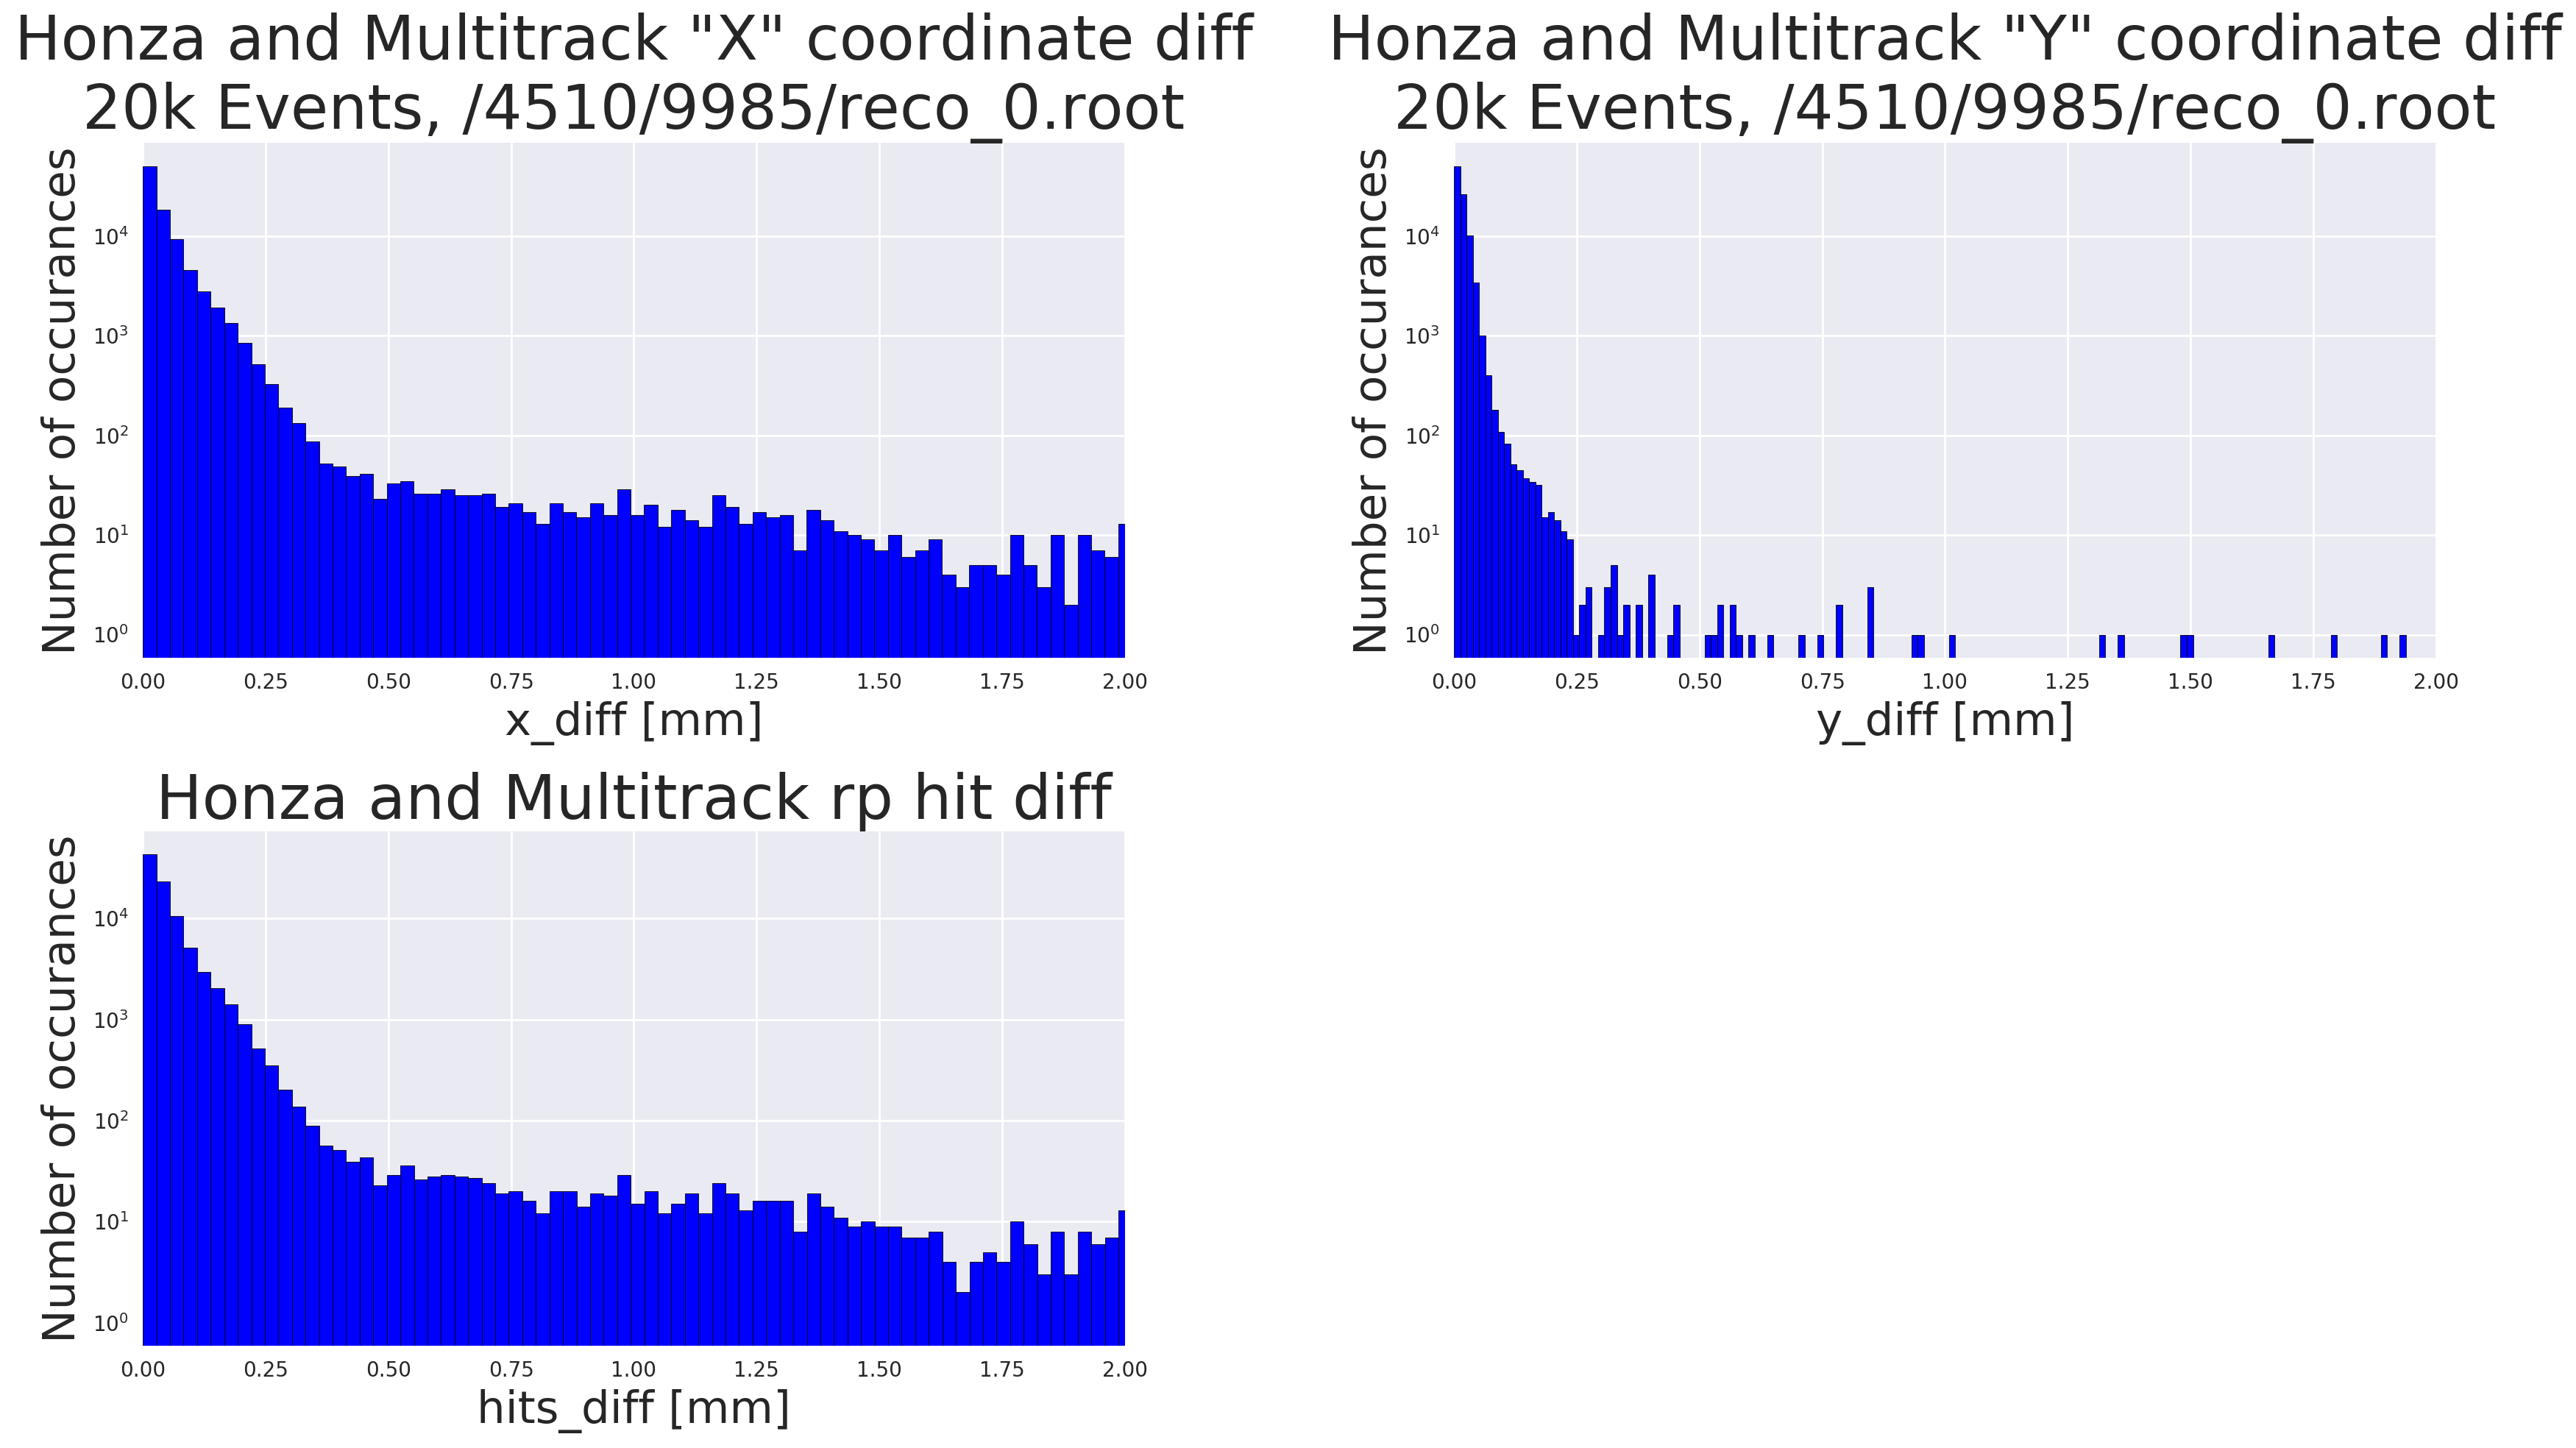

In [7]:
plot_diff(compare_20k_ev_df, 1000)

### Plotting differences [strip unit]

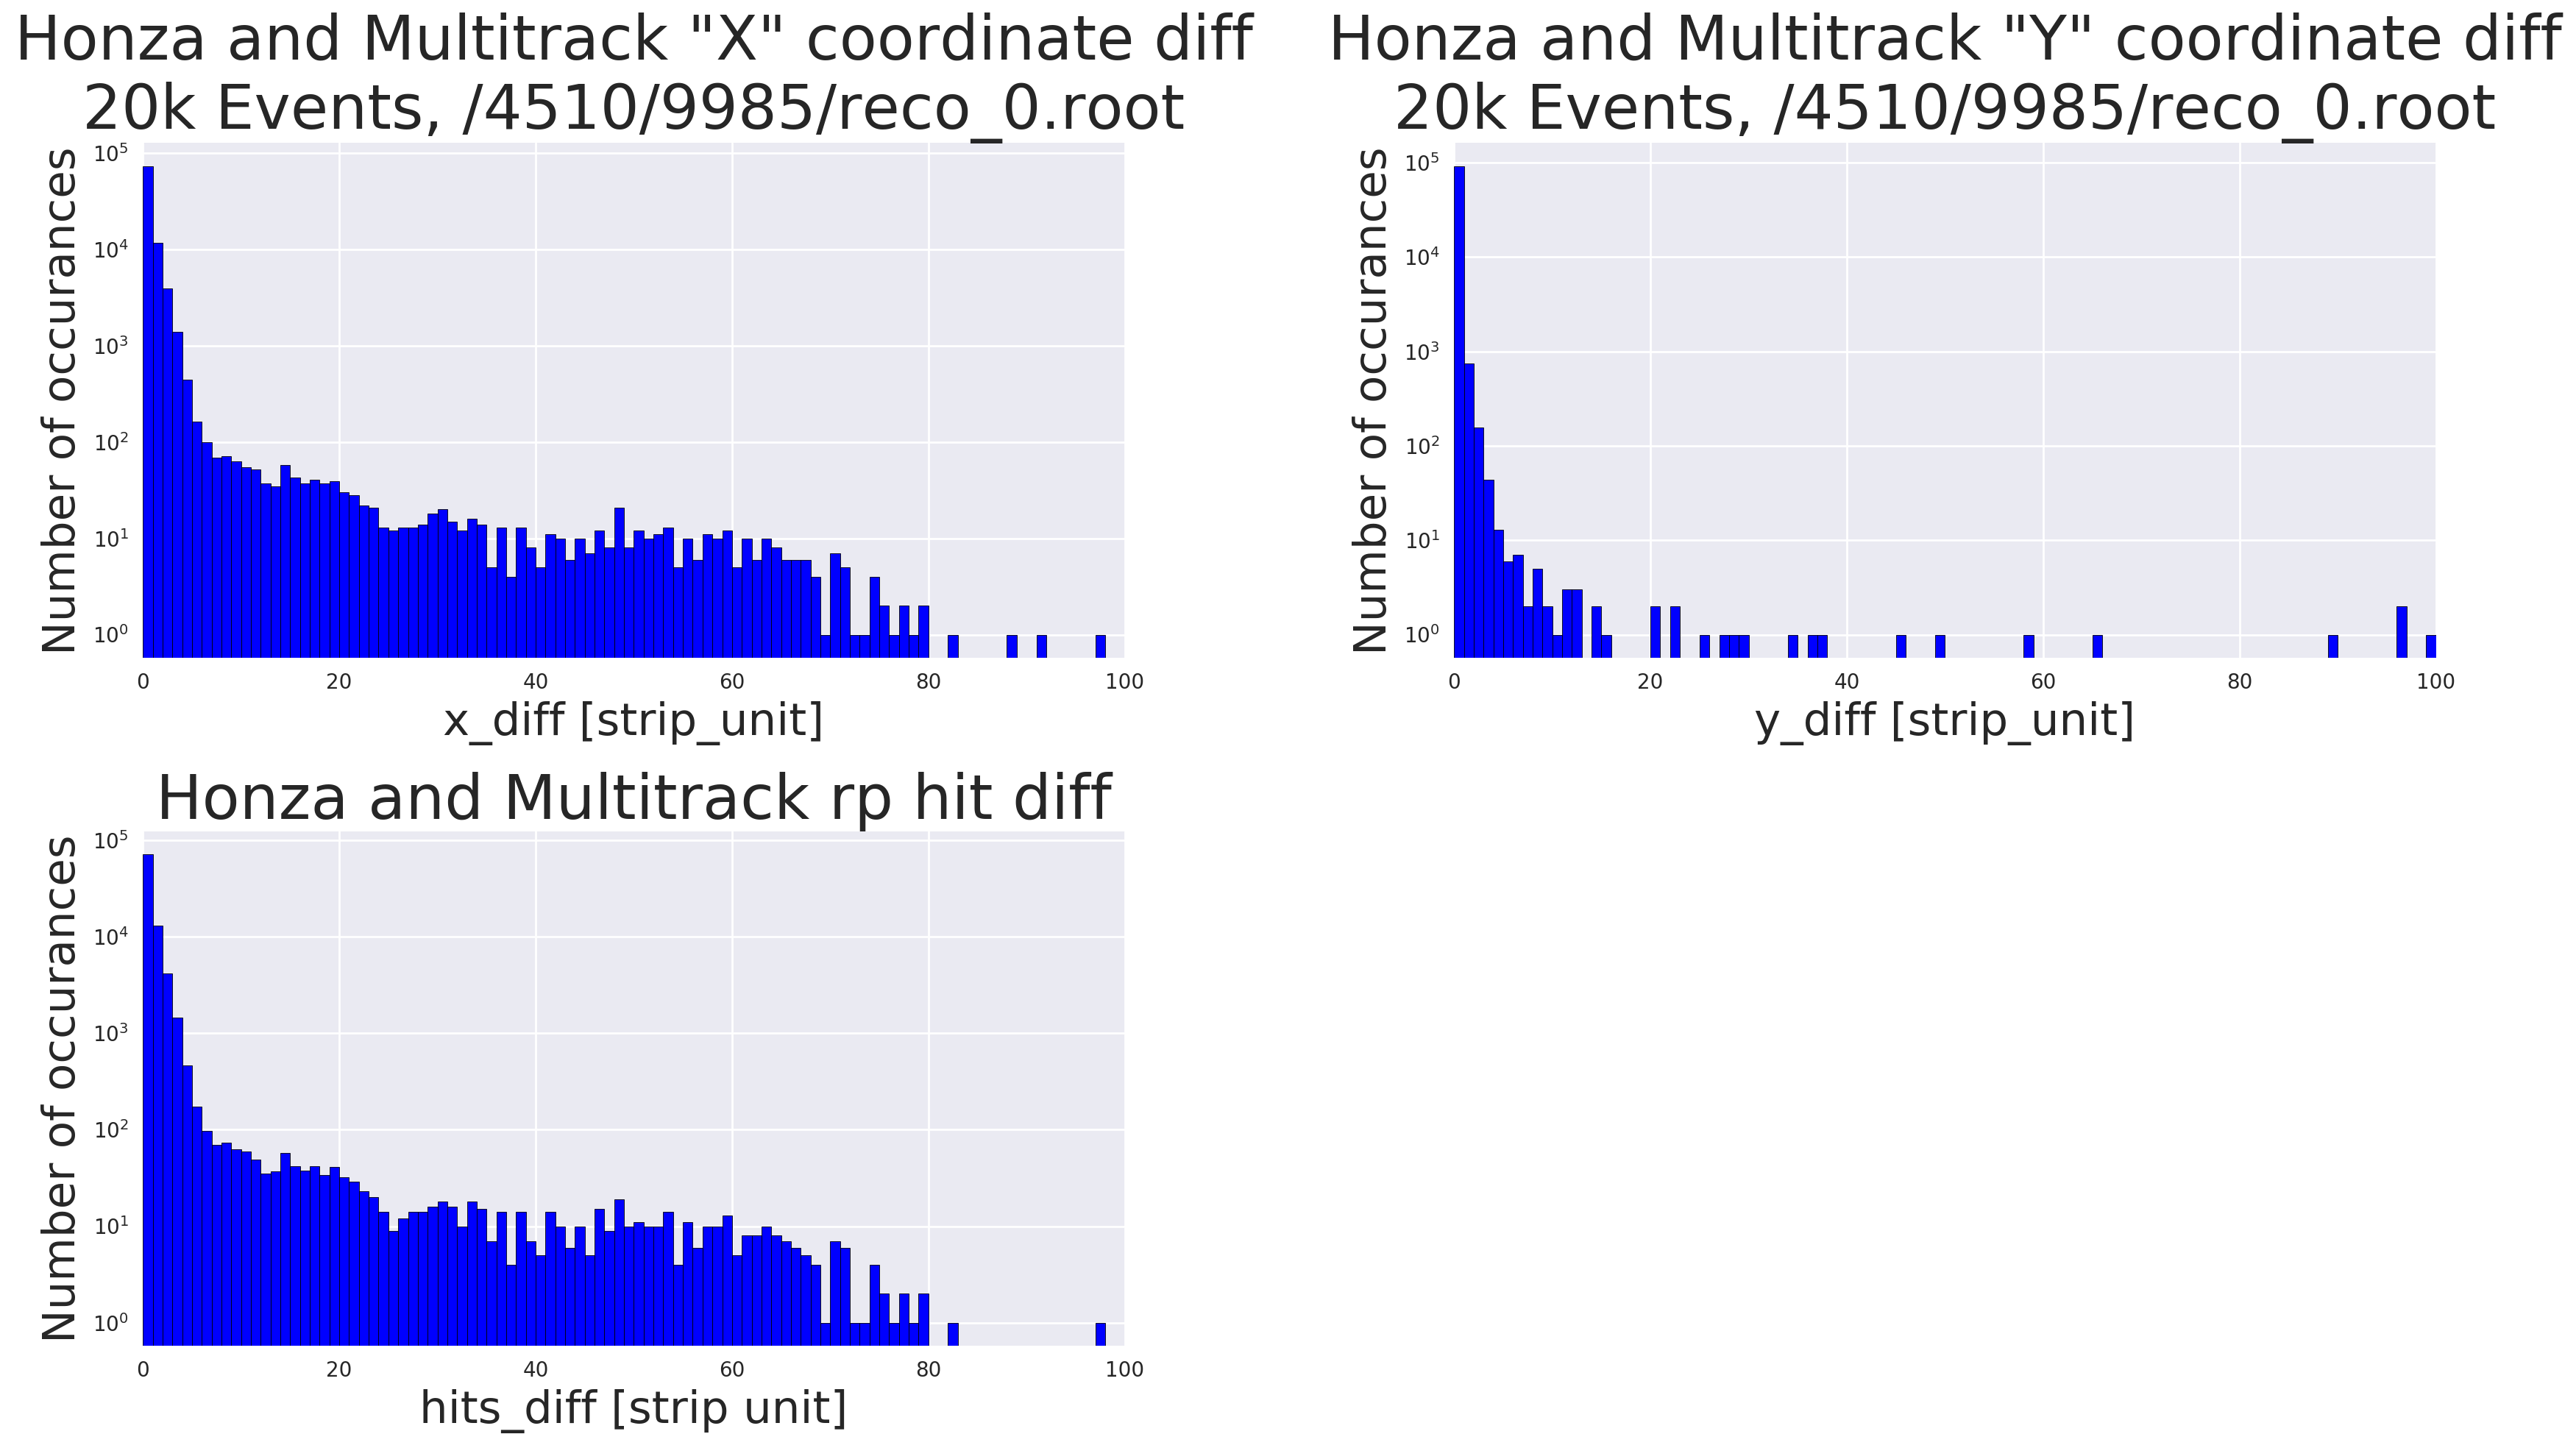

In [8]:
# plot_diff(compare_20k_ev_df, 500, strip_units=True)
plot_diff(compare_20k_ev_df, range(0,101), strip_units=True)

## Plot axes histos

In [12]:
def plot_specific_axes(plot_no, compare_df, axis_column, bins, rp_number):
    ax = plt.subplot(2,2,plot_no)
    ax.hist(compare_df[axis_column], bins = bins, color = 'green', edgecolor = 'black', log=True)
    ax.set_title("RP {} {}".format(rp_number, axis_column), size = 30)
    ax.set_xlabel(axis_column, size = 22)
    ax.set_ylabel("Number of occurances", size = 22)

def plot_axes(compare_df, x_bins, y_bins, rp_number):
    figsize(18, 10)
  
    plot_specific_axes(1, compare_df, HONZA_X_COLUMN, x_bins, rp_number)
    plot_specific_axes(2, compare_df, MULTI_X_COLUMN, x_bins, rp_number)
    plot_specific_axes(3, compare_df, HONZA_Y_COLUMN, y_bins, rp_number)
    plot_specific_axes(4, compare_df, MULTI_Y_COLUMN, y_bins, rp_number)
    
    plt.tight_layout()
    plt.show()

In [10]:
rp_number = 104
rp_104_df = compare_20k_ev_df.loc[(compare_20k_ev_df['RP'] == rp_number)]

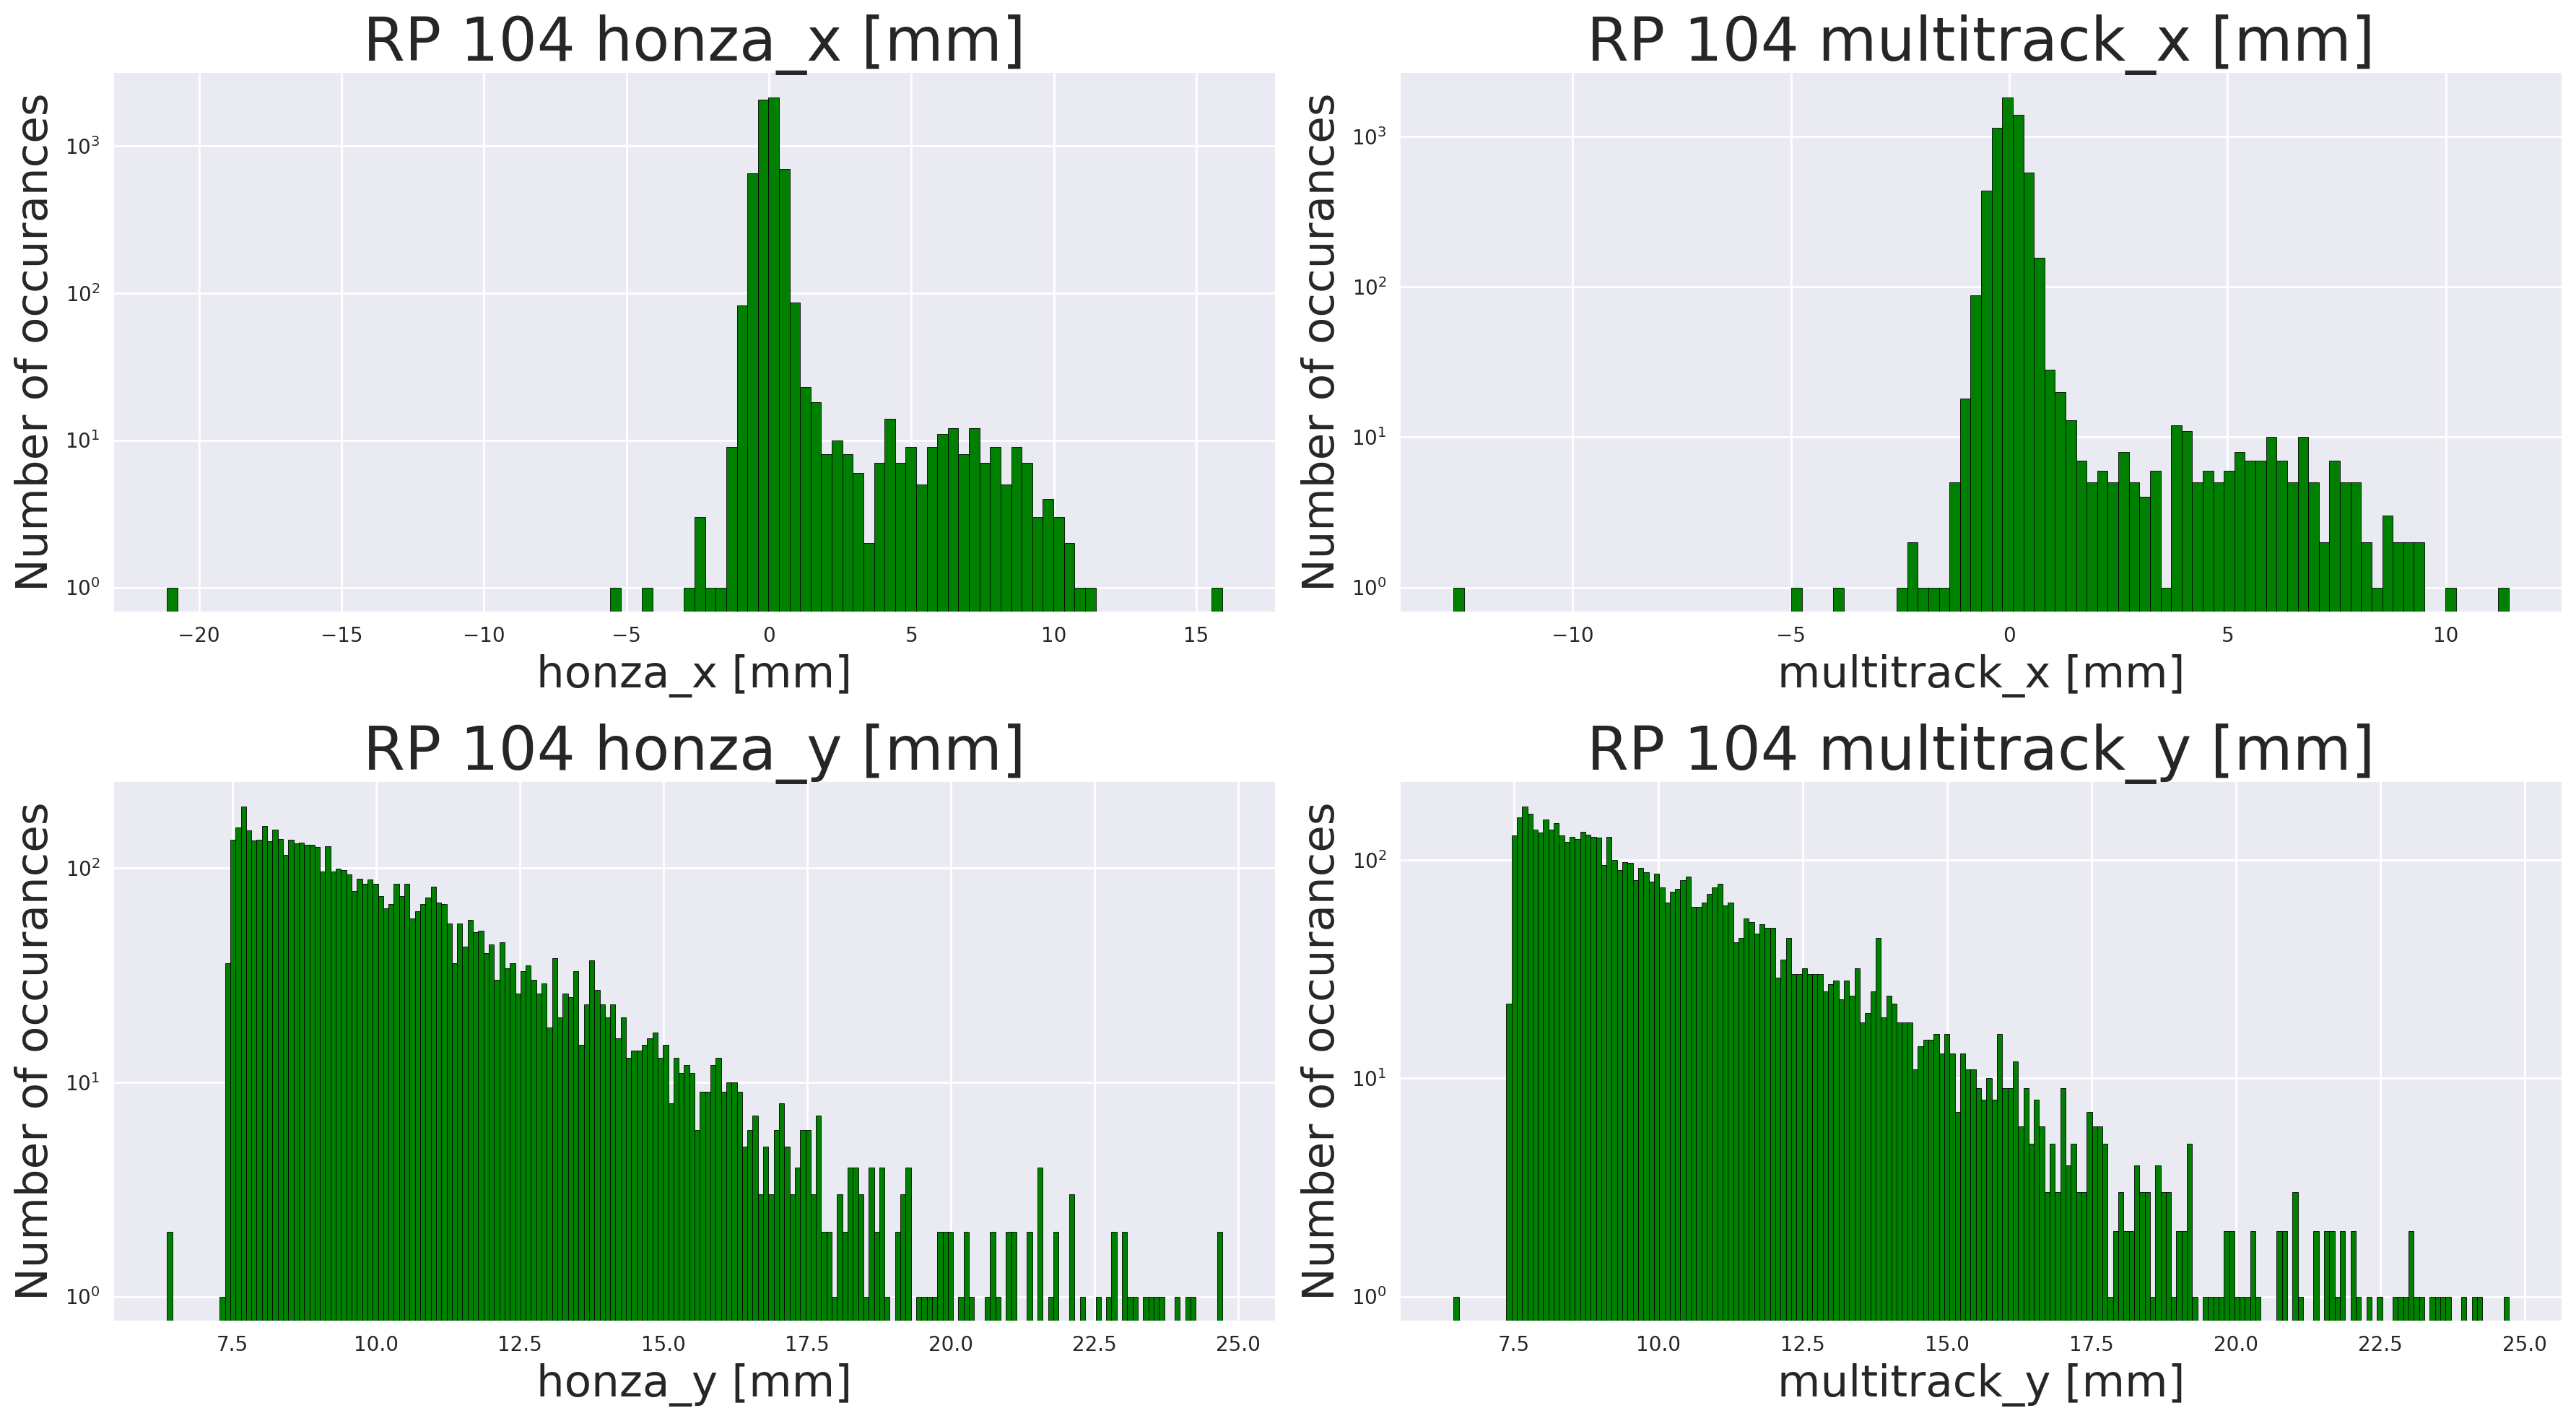

In [13]:
plot_axes(rp_104_df, 100, 200, rp_number)

## Hits heat map RP comparison 

In [14]:
# list(compare_20k_ev_df.columns.values)
list(compare_20k_ev_df)

['Unnamed: 0',
 'Event',
 'Group',
 'RP',
 'rp z [mm]',
 'honza_x [mm]',
 'multitrack_x [mm]',
 'honza_y [mm]',
 'multitrack_y [mm]',
 'x_diff [mm]',
 'y_diff [mm]',
 'hits_diff [mm]',
 'x_diff [strip_unit]',
 'y_diff [strip_unit]',
 'hits_diff [strip unit]']

In [15]:
# COUNT OCCURANCES
group_count = compare_20k_ev_df.groupby('Group').size()
group_count

Group
L-BOT    25014
L-HOR       99
L-TOP    24477
R-BOT    24654
R-HOR       33
R-TOP    17763
dtype: int64

In [16]:
'''
Things to investigate:
    - check whether axis show real data
    - plot RPs separately --> you need to know whether rotated data is good, but it will be on the same line
'''

'\nThings to investigate:\n    - check whether axis show real data\n    - plot RPs separately --> you need to know whether rotated data is good, but it will be on the same line\n'

In [51]:
def get_rp_column_values(compare_df, rp_id, column_name):
    rp_df = compare_df.loc[(compare_df['RP'] == rp_id)]
    return rp_df[column_name].values

def plot_rp_hits(compare_df, rp_id):

    figsize(6, 10)
    
    # CREATE DATA
    x = get_rp_column_values(compare_df, rp_id, HONZA_X_COLUMN)
    y = get_rp_column_values(compare_df, rp_id, HONZA_Y_COLUMN)
    
    # CREATE HEATMAP
    trans2red = colors.LinearSegmentedColormap.from_list(name='Trans2Red', colors=[(1., 0., 0., 0.), (1., 0., 0., 1.)])
    heatmap, yedges, xedges = np.histogram2d(x, y, bins=(1024, 1024))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    print("xe0: {}\nxe-1: {}\nye0: {}\nye-1: {}\n".format(xedges[0], xedges[-1], yedges[0], yedges[-1]))
    
    # PLOT HEATMAP
    plt.clf()
    plt.title('RP hits')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.imshow(heatmap, extent=extent, cmap=trans2red)
#     plt.imshow(heatmap, cmap=trans2red)
    plt.show()

xe0: 6.36243803368
xe-1: 24.7191254609
ye0: -21.1274933647
ye-1: 15.9149723693



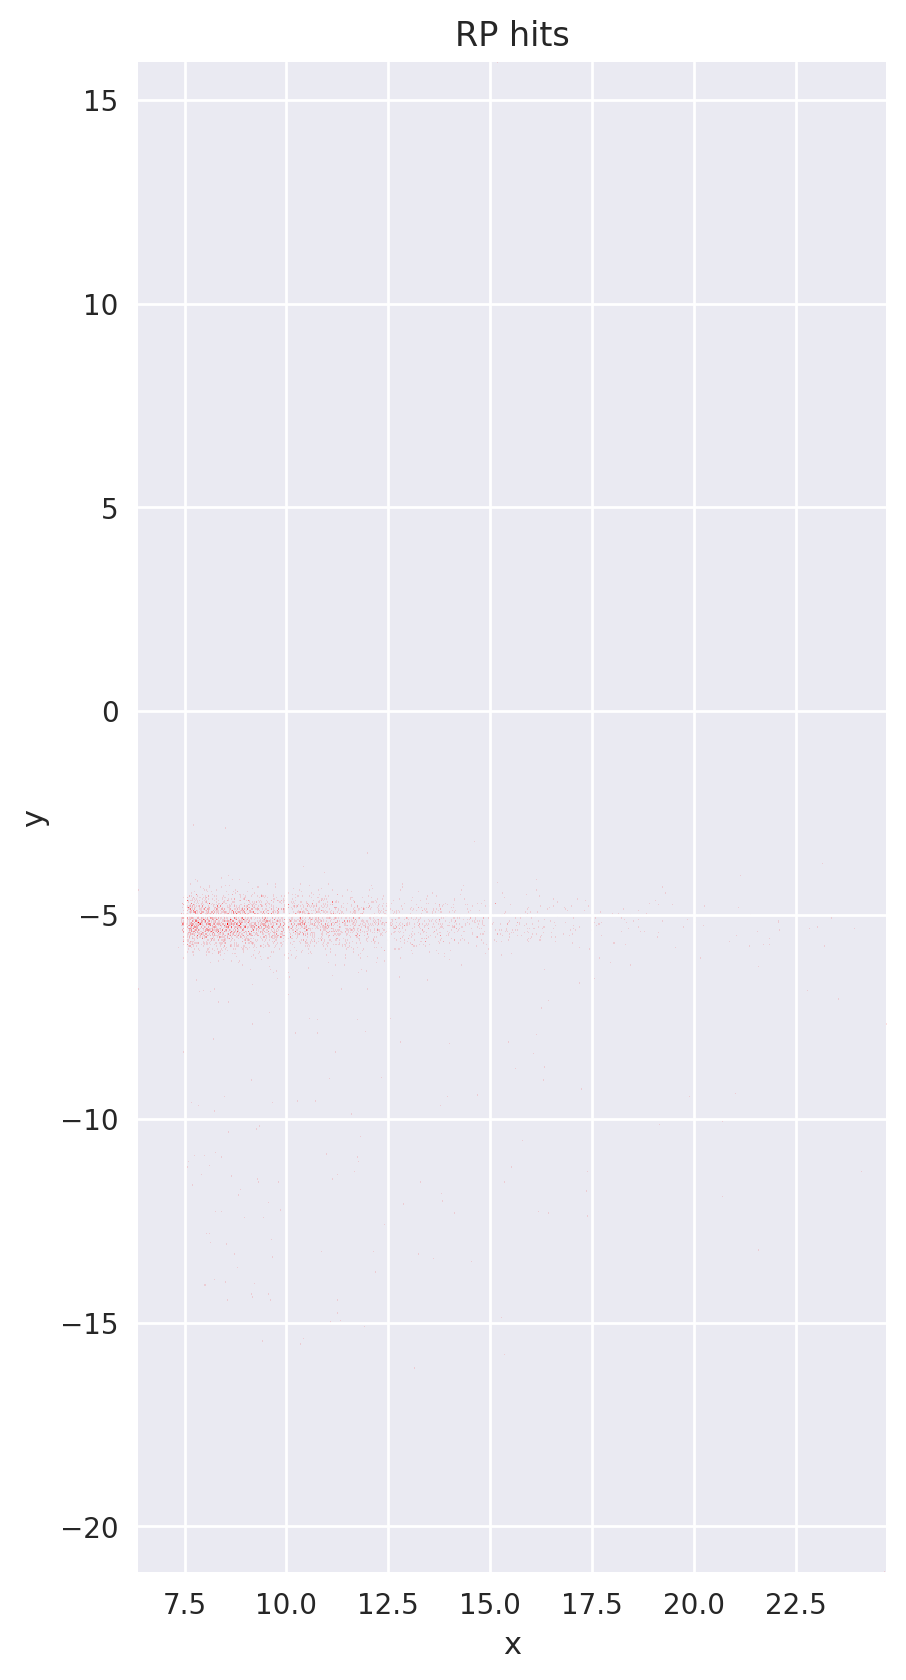

In [52]:
plot_rp_hits(compare_20k_ev_df, rp_id=104)

In [63]:
def plot_all_rp_hits(compare_df, X_COLUMN, Y_COLUMN, title_prefix, cmap):
    '''
    What is needed here?
    Just x array and y array
    '''
    # CREATE DATA
    x = compare_df[X_COLUMN].values 
    y = compare_df[Y_COLUMN].values 
    
    # CREATE HEATMAP
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=(1024, 1024))
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # PLOT HEATMAP
    plt.clf()
    plt.title('{} RP hits'.format(title_prefix))
    plt.ylabel('y')
    plt.xlabel('x')
#     plt.imshow(heatmap, extent=extent, cmap=plt.get_cmap('rainbow'))
    plt.imshow(heatmap, extent=extent, cmap=cmap)
    plt.show()

trans2red = colors.LinearSegmentedColormap.from_list(name='Trans2Red', colors=[(1., 0., 0., 0.), (1., 0., 0., 1.)])
trans2green = colors.LinearSegmentedColormap.from_list(name='Trans2Red', colors=[(0., 1., 0., 0.), (0., 1., 0., 1.)])

# plot_all_rp_hits(compare_20k_ev_df, HONZA_X_COLUMN, HONZA_Y_COLUMN, "Honza", trans2green)

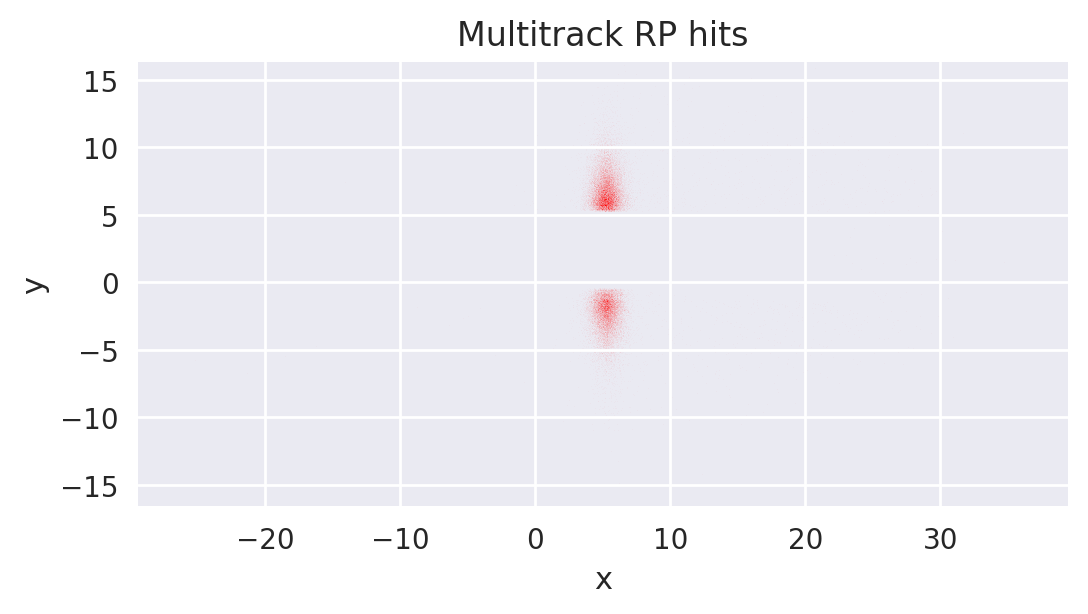

In [64]:
plot_all_rp_hits(compare_20k_ev_df, MULTI_X_COLUMN, MULTI_Y_COLUMN, "Multitrack", trans2red)

## Dataframe with % of hits distant by strip units

In [60]:
class DfUtility:
    @staticmethod
    def get_row_df(row_data, column_names):
        row_data_dict = {}
        for i, (key, val) in enumerate(zip(column_names, row_data)):
            row_data_dict[key] = [val]

        return pd.DataFrame(row_data_dict, columns=column_names)

    @staticmethod
    def get_df(data2D, column_names):
        # WE ASSUME DATA IS 2D ARRAY
        row_dfs = []
        for row_data in data2D:
            row_dfs.append(DfUtility.get_row_df(row_data, column_names))

        return pd.concat(row_dfs, ignore_index=True)

In [61]:
group_count = compare_20k_ev_df.groupby(HITS_DIFF_STRIP_UNIT_COLUMN).size()
entries_no = compare_20k_ev_df.shape[0]
percent_series = 100 * group_count / entries_no

SILICON_COLUMN = "Silicon Unit"
HIT_PERCENT_COLUMN = "Hit percent"
HIT_PERCENT_ACC_COLUMN = "Hit percent acc"

silicon_no = []
hit_percent = []
hit_percent_acc = []
acc = 0.0

for idx, percent in percent_series.iteritems():
    acc = acc + percent
    silicon_no.append(idx)
    hit_percent.append(percent)
    hit_percent_acc.append(acc)
    
silicon_percent_data2D = np.array([silicon_no, hit_percent, hit_percent_acc]).T
silicon_percent_column_names = [SILICON_COLUMN, HIT_PERCENT_COLUMN, HIT_PERCENT_ACC_COLUMN]

silicon_percent_df = DfUtility.get_df(silicon_percent_data2D, silicon_percent_column_names)
silicon_percent_df


,Silicon Unit,Hit percent,Hit percent acc
0,0.0,77.476097,77.476097
1,1.0,14.207953,91.684050
2,2.0,4.570839,96.254889
3,3.0,1.580834,97.835724
4,4.0,0.506302,98.342025
5,5.0,0.190135,98.532160
6,6.0,0.105389,98.637549
7,7.0,0.076054,98.713603
8,8.0,0.080400,98.794003
9,9.0,0.068449,98.862451
